# TP1 - Implémentation du Perceptron avec Descente de Gradient

### Étape 1 : Concepts de base
#### Définition du Perceptron :
Le perceptron est un modèle de classification binaire linéaire, qui détermine la classe d’une donnée à partir d’une combinaison linéaire de ses caractéristiques.

### Étape 2 : Génération & Visualisation des Données

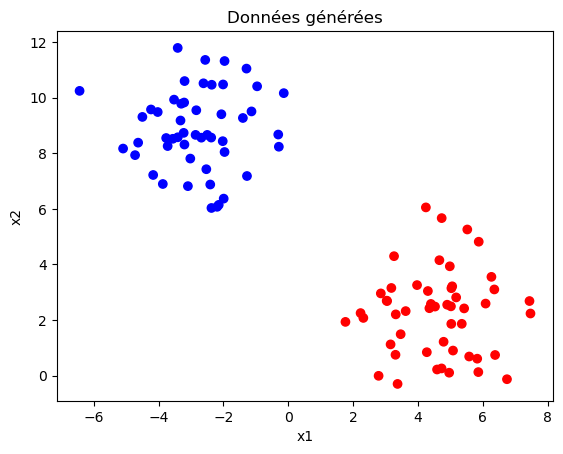

{0: 50, 1: 50}


In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=2, cluster_std=1.5, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.title("Données générées")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# Nombre de points par classe
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))


### Étape 3 : Fonction Sigmoïde

In [65]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Test
z_values = np.array([-10, -1, 0, 1, 10])
print(sigmoid(z_values))

[4.53978687e-05 2.68941421e-01 5.00000000e-01 7.31058579e-01
 9.99954602e-01]


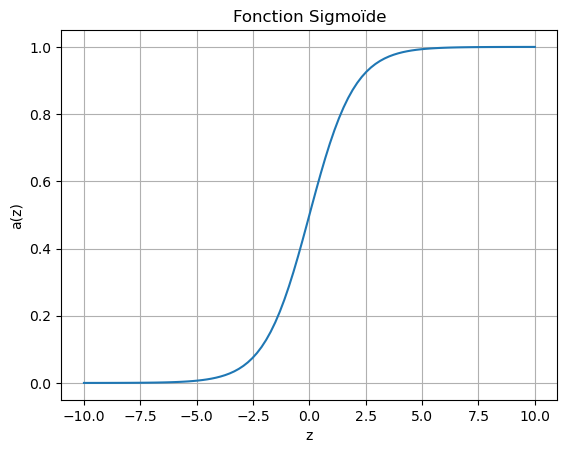

In [67]:
z = np.linspace(-10, 10, 100)
a = sigmoid(z)
plt.plot(z, a)
plt.title("Fonction Sigmoïde")
plt.xlabel("z")
plt.ylabel("a(z)")
plt.grid(True)
plt.show()

### Étape 4 : Fonction Coût

In [70]:
def cost_function(y, y_pred):
    m = len(y)
    return - (1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

In [72]:
y = np.array([1, 0, 1, 0])
y_pred = np.array([0.9, 0.1, 0.8, 0.2])
print("Cost =", cost_function(y, y_pred))

Cost = 0.164252033486018


### Étape 5 : Descente de Gradient

In [75]:
def gradient_descent_step(X, y, w, b, alpha):
    m = len(y)
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)
    
    dw = (1/m) * np.dot(X.T, (y_pred - y))
    db = (1/m) * np.sum(y_pred - y)
    
    w -= alpha * dw
    b -= alpha * db
    
    return w, b

### Étape 6 : Entraînement du Perceptron

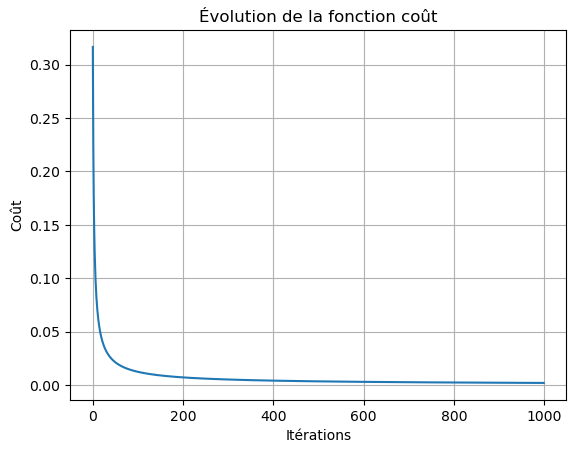

In [86]:
def train(X, y, alpha=0.1, iterations=1000):
    w = np.zeros(X.shape[1])  # Initialisation des poids
    b = 0
    costs = []

    for i in range(iterations):
        w, b = gradient_descent_step(X, y, w, b, alpha)
        y_pred = sigmoid(np.dot(X, w) + b)
        cost = cost_function(y, y_pred)
        costs.append(cost)

    return w, b, costs

# Entraînement
w, b, costs = train(X, y, alpha=0.1, iterations=1000)

# Affichage du coût
plt.plot(costs)
plt.title("Évolution de la fonction coût")
plt.xlabel("Itérations")
plt.ylabel("Coût")
plt.grid(True)
plt.show()

### Étape 7 : Prédiction & Évaluation

In [88]:
def predict(X, w, b):
    probs = sigmoid(np.dot(X, w) + b)
    return (probs >= 0.5).astype(int)

# Prédictions et précision
y_pred = predict(X, w, b)
accuracy = np.mean(y_pred == y)
print("Précision :", accuracy)

Précision : 1.0
